In [8]:
import numpy as np
import pandas as pd
import ROOT as r
import os 
import sys
import time
import uproot 
import awkward_pandas

In [30]:
import array as arr

In [32]:
import awkward as ak

In [2]:
from constant import uprootInputs


In [3]:
r.gROOT.SetBatch(1)

In [9]:
filename1 = 'MilliQan_Run1202.237_v34.root'
fin = uproot.open(filename1)
tree = fin['t']
myarray = tree.arrays(uprootInputs,library='pd')

In [10]:
myarray["event"]

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: event, Length: 1000, dtype: int32

In [25]:
myarray["pickupFlag"]== False

0      [True, True, True, True, False, True, True, Tr...
1                [True, True, False, True, False, False]
2                                          [True, False]
3      [True, True, True, True, True, False, True, Tr...
4      [True, True, True, True, False, True, False, T...
                             ...                        
995                                 [True, False, False]
996    [True, False, True, False, True, True, True, F...
997    [True, True, True, True, True, True, True, Fal...
998                                              [False]
999    [False, False, True, True, True, False, True, ...
Name: pickupFlag, Length: 1000, dtype: awkward

In [24]:
myarray[myarray["pickupFlag"]== False]

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-28/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

This error occurred while calling

    numpy.asarray(
        <Array [[True, True, ..., True, False], ...] type='1000 * var * bool'>
        dtype = dtype[bool_]-instance
    )

What makes the cell above fail? [myarray["pickupFlag"]== False] returns pulse based True false table. myarray table is the mix of pulse based and event based tables. They have different array length, so it crash.

In [12]:
myarray

,event,nPE,height,area,chan,row,column,layer,type,pickupFlag,board
0,0,"[34.49435043334961, 5.164087772369385, 23.9705...","[834.7025756835938, 159.44390869140625, 591.70...","[27608.2421875, 4133.18115234375, 25175.537109...","[52, 52, 53, 53, 53, 53, 53, 69, 69]","[3, 3, 3, 3, 3, 3, 3, 4, 4]","[2, 2, 3, 3, 3, 3, 3, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 2, 2]","[False, False, False, False, True, False, Fals...","[3, 3, 3, 3, 3, 3, 3, 4, 4]"
1,1,"[17.327699661254883, 17.740549087524414, 0.120...","[710.15234375, 578.4378051757812, 35.546146392...","[22873.775390625, 23418.765625, 298.8862304687...","[6, 9, 10, 12, 14, 53]","[2, 1, 0, 1, 0, 3]","[2, 1, 0, 2, 2, 3]","[0, 0, 0, 0, 0, 3]","[0, 0, 0, 0, 0, 0]","[False, False, True, False, True, True]","[0, 0, 0, 0, 0, 3]"
2,2,"[1.845363974571228, 1648.2103271484375]","[61.8840446472168, 65.7232666015625]","[2021.6146240234375, 1648.2103271484375]","[46, 70]","[0, 0]","[2, -1]","[2, 0]","[0, 2]","[False, True]","[2, 4]"
3,3,"[50.27479553222656, 2.1452269554138184, 4.6710...","[1250.175537109375, 57.70257568359375, 150.741...","[75215.1171875, 3209.43115234375, 6166.0712890...","[0, 0, 12, 18, 34, 45, 57, 57, 57, 57, 57, 59,...","[3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0]","[0, 0, 2, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, True, Fals...","[0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]"
4,4,"[0.5228163003921509, 1.2120945453643799, 70.50...","[31.497472763061523, 45.49945068359375, 1249.9...","[690.1541137695312, 1339.849365234375, 68460.2...","[7, 15, 16, 16, 16, 32, 33, 35, 38, 39, 39, 61...","[2, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1]","[3, 3, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 0, 0, 1, 1]","[0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, True, False, True...","[0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4]"
...,...,...,...,...,...,...,...,...,...,...,...
995,995,"[42640.72265625, 1269.01904296875, 206.3773651...","[829.4407958984375, 49.91661834716797, 16.7545...","[42640.72265625, 1269.01904296875, 206.3773651...","[68, 68, 69]","[4, 4, 4]","[0, 0, 0]","[0, 0, 2]","[2, 2, 2]","[False, True, True]","[4, 4, 4]"
996,996,"[3.1090457439422607, 0.9015002846717834, 2.321...","[115.227294921875, 50.21115493774414, 68.92465...","[4104.158203125, 1190.04345703125, 3065.157958...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 38, 53, 57, 59,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, True, False, True, False, False, False...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3]"
997,997,"[21.264760971069336, 0.28888237476348877, 0.17...","[850.3159790039062, 21.820079803466797, 14.843...","[27066.638671875, 367.7010192871094, 226.82763...","[4, 4, 4, 10, 10, 14, 29, 36, 36, 36, 36, 50, ...","[3, 3, 3, 0, 0, 0, 1, 3, 3, 3, 3, 2, 3, 1, 1]","[2, 2, 2, 0, 0, 2, 3, 2, 2, 2, 2, 0, 3, 1, 0]","[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3, 4]"
998,998,[50.805938720703125],[11.258383750915527],[50.805938720703125],[71],[0],[-1],[2],[2],[True],[4]


In [16]:
myarray[myarray["event"]==1]["area"]

1    [22873.775390625 23418.765625 298.88623046875 ...
Name: area, dtype: awkward

In [19]:
myarray["nPE"]>=1

0      [True, True, True, False, False, False, False,...
1                [True, True, False, True, False, False]
2                                           [True, True]
3      [True, True, True, True, True, False, True, Tr...
4      [False, True, True, False, False, False, False...
                             ...                        
995                                   [True, True, True]
996    [True, False, True, True, True, False, True, F...
997    [True, False, False, True, False, True, True, ...
998                                               [True]
999    [True, False, True, False, True, False, True, ...
Name: nPE, Length: 1000, dtype: awkward

pulse based analysis

In [37]:
branches = tree.arrays(["height","nPE"], cut="pickupFlag == False")

In [38]:
branches

<Array [{height: [...], nPE: [...]}, ...] type='1000 * {height: var * float...'>

Warning in <TROOT::Append>: Replacing existing TH1: h_NPE (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


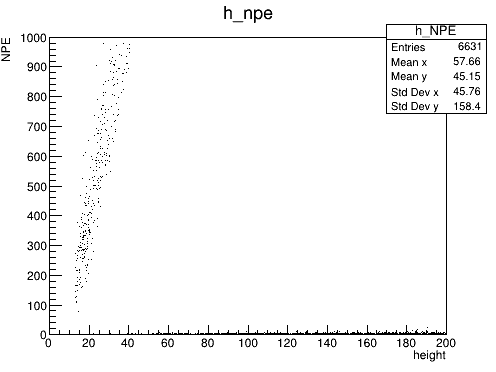

In [42]:
NPE_height = r.TH2F("h_NPE","h_npe;height;NPE",200, 0, 200,1000,0,1000)
heights = arr.array('d', ak.flatten(branches['height']))
nPE = arr.array('d', ak.flatten(branches['nPE']))
#fill the histogram
#inputs are number of entries, xvalues,yvalues and weights
NPE_height.FillN(len(heights), heights, nPE,np.ones(len(heights)))
c1 = r.TCanvas("c1", "c1", 500, 400)
c1.cd()
NPE_height.Draw()
c1.Draw()

In [34]:
uptree = uproot.open("MilliQan_Run1202.237_v34.root:t")

In [35]:
uptree.typenames()

{'event': 'int32_t',
 'runNumber': 'int64_t',
 'fileNumber': 'int64_t',
 'boardsMatched': 'bool',
 'DAQEventNumber': 'int32_t',
 'daqFileOpen': 'uint64_t',
 'daqFileClose': 'uint64_t',
 'totalFillLumi': 'float',
 'fillId': 'int32_t',
 'beamType': 'TString',
 'beamEnergy': 'float',
 'betaStar': 'float',
 'beamOn': 'bool',
 'fillStart': 'uint64_t',
 'fillEnd': 'uint64_t',
 'triggerThreshold': 'std::vector<float>',
 'triggerEnable': 'std::vector<bool>',
 'triggerMajority': 'std::vector<int32_t>',
 'triggerLogic': 'std::vector<int32_t>',
 'dynamicPedestal': 'std::vector<float>',
 'sidebandMean': 'std::vector<float>',
 'sidebandRMS': 'std::vector<float>',
 'maxThreeConsec': 'std::vector<float>',
 'chan': 'std::vector<int32_t>',
 'chanWithinBoard': 'std::vector<int32_t>',
 'row': 'std::vector<int32_t>',
 'column': 'std::vector<int32_t>',
 'layer': 'std::vector<int32_t>',
 'type': 'std::vector<int32_t>',
 'board': 'std::vector<int32_t>',
 'height': 'std::vector<float>',
 'area': 'std::vector<